# Exploratory Data Analysis (EDA)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


In [9]:
# Load the dataset
df = pd.read_csv('scraped_cnn_news_100_pages_expanded.csv')


In [10]:
# 1. Basic Overview
print("Basic Info of Dataset:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

Basic Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13221 entries, 0 to 13220
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0       keyword  13221 non-null  object
 1   title        13221 non-null  object
 2   desc         13085 non-null  object
 3   date         13221 non-null  object
 4   link         13221 non-null  object
dtypes: object(5)
memory usage: 516.6+ KB
None

Missing Values:
    keyword      0
title            0
desc           136
date             0
link             0
dtype: int64

Basic Statistics:
                  keyword                        title  \
count               13221                        13221   
unique                 20                         6979   
top     Political debates  5 stories to start your day   
freq                  963                           16   

                                                     desc          date  \
count                    

In [11]:
print(df.columns)


Index(['    keyword', 'title', 'desc', 'date', 'link'], dtype='object')


In [12]:
df.columns = df.columns.str.strip()

# Verify the column names after cleaning
print(df.columns)

Index(['keyword', 'title', 'desc', 'date', 'link'], dtype='object')


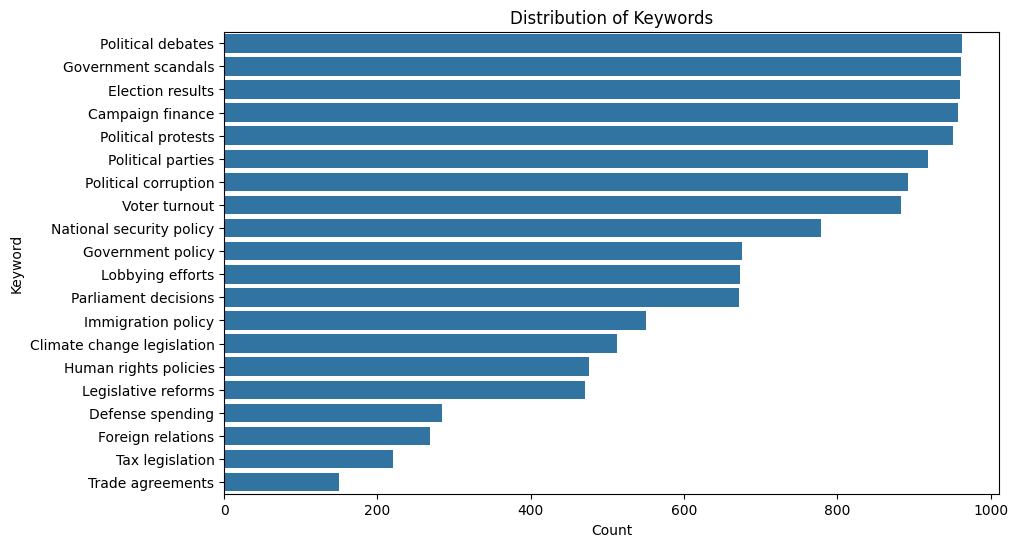

In [13]:
# 2. Distribution of Keywords
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='keyword', order=df['keyword'].value_counts().index)
plt.title('Distribution of Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

In [14]:
# 3. Date Distribution (Convert 'date' column to datetime)
df['date'] = pd.to_datetime(df['date'], errors='coerce')


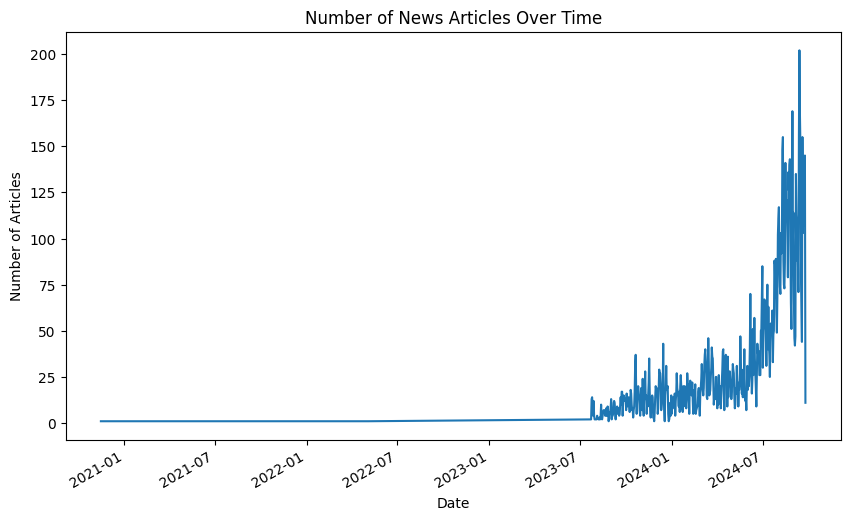

In [15]:
# Plotting the number of news articles by date
plt.figure(figsize=(10,6))
df['date'].value_counts().sort_index().plot()
plt.title('Number of News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

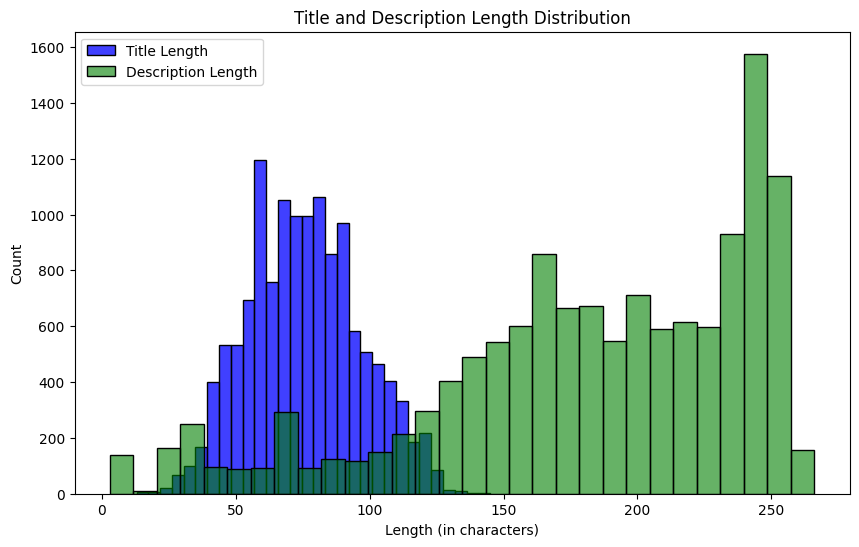

In [16]:
# 4. Title and Description Length Analysis
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['desc_length'] = df['desc'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10,6))
sns.histplot(df['title_length'], bins=30, color='blue', label='Title Length')
sns.histplot(df['desc_length'], bins=30, color='green', label='Description Length', alpha=0.6)
plt.title('Title and Description Length Distribution')
plt.xlabel('Length (in characters)')
plt.legend()
plt.show()

In [17]:
# 5. Check for Duplicates
duplicates = df.duplicated(subset=['title', 'desc']).sum()
print(f"\nNumber of Duplicate Entries: {duplicates}")


Number of Duplicate Entries: 5993


In [18]:
# 6. Most Common Words in Titles and Descriptions (Excluding stopwords)
def get_top_n_words(column, n=20):
    all_words = ' '.join([text for text in column])
    words = all_words.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

In [19]:
# Assuming 'stopwords' is a list of common stopwords
stopwords = set(['the', 'is', 'in', 'and', 'to', 'of', 'for', 'a', 'on'])

# Most common words in titles
title_words = df['title'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stopwords]))
common_title_words = get_top_n_words(title_words, n=20)
print("\nMost Common Words in Titles:")
print(common_title_words)

# Most common words in descriptions
desc_words = df['desc'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stopwords]))
common_desc_words = get_top_n_words(desc_words, n=20)
print("\nMost Common Words in Descriptions:")
print(common_desc_words)


Most Common Words in Titles:
[('trump', 1989), ('harris', 1215), ('election', 992), ('as', 964), ('biden', 957), ('with', 948), ('us', 907), ('new', 865), ('campaign', 720), ('are', 686), ('what', 681), ('says', 680), ('how', 670), ('at', 623), ('about', 617), ('presidential', 600), ('from', 570), ('house', 559), ('over', 552), ('why', 550)]

Most Common Words in Descriptions:
[('president', 4061), ('that', 3389), ('...', 2878), ('with', 2608), ('donald', 2397), ('former', 2363), ('as', 2257), ('cnn’s', 2132), ('trump', 2107), ('his', 1799), ('kamala', 1735), ('at', 1718), ('presidential', 1711), ('has', 1666), ('an', 1664), ('us', 1531), ('are', 1529), ('new', 1513), ('from', 1483), ('by', 1409)]


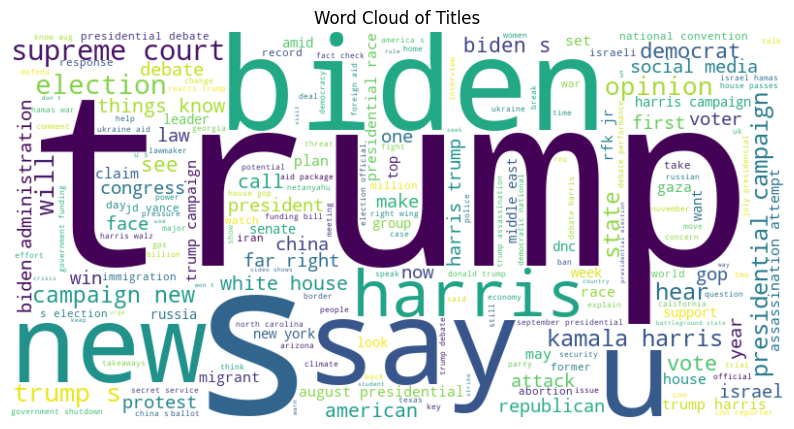

In [20]:
# 7. Word Cloud for Titles and Descriptions (Optional Visualization)
wc_title = WordCloud(width=800, height=400, background_color='white').generate(' '.join(title_words))
plt.figure(figsize=(10,6))
plt.imshow(wc_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

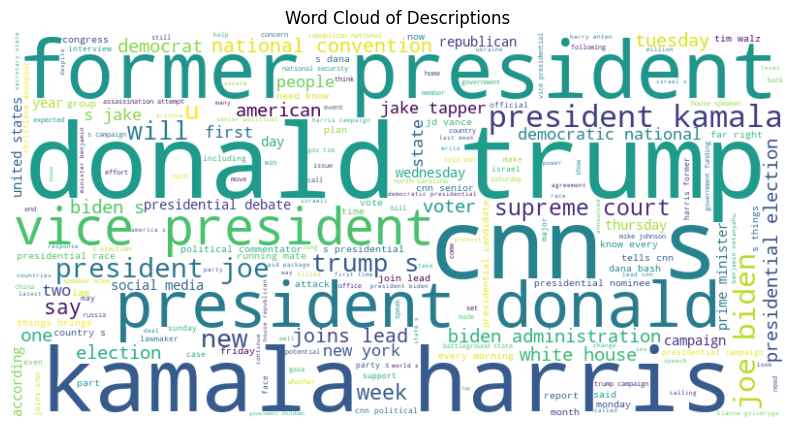

In [21]:
wc_desc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(desc_words))
plt.figure(figsize=(10,6))
plt.imshow(wc_desc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()